In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../..')
import leximin_assignment
import assignment

from tqdm import tqdm

In [95]:
N = 500

costs = np.arange(1, N ** 2 + 1) / (N + 1)

cost_matrix = np.zeros((N, N))

i = 0
for diag_id in range(N):
    for row in range(diag_id, -1, -1):
        cost_matrix[row, diag_id - row] = costs[i]
        i += 1

for diag_id in range(N, 2 * N - 1):
    for row in range(N - 1, diag_id - N, -1):
        cost_matrix[row, diag_id - row] = costs[i]
        i += 1
        
cost_matrix = np.array(cost_matrix)
cost_matrix

array([[1.99600798e-03, 5.98802395e-03, 1.19760479e-02, ...,
        2.48005988e+02, 2.49001996e+02, 2.50000000e+02],
       [3.99201597e-03, 9.98003992e-03, 1.79640719e-02, ...,
        2.49000000e+02, 2.49998004e+02, 2.50996008e+02],
       [7.98403194e-03, 1.59680639e-02, 2.59481038e-02, ...,
        2.49996008e+02, 2.50994012e+02, 2.51990020e+02],
       ...,
       [2.47013972e+02, 2.48009980e+02, 2.49007984e+02, ...,
        4.98978044e+02, 4.98988024e+02, 4.98996008e+02],
       [2.48007984e+02, 2.49005988e+02, 2.50003992e+02, ...,
        4.98986028e+02, 4.98994012e+02, 4.99000000e+02],
       [2.49003992e+02, 2.50001996e+02, 2.50998004e+02, ...,
        4.98992016e+02, 4.98998004e+02, 4.99001996e+02]])

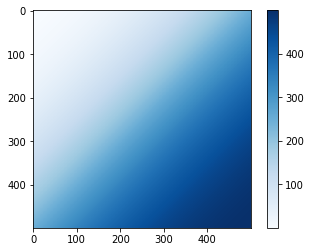

In [96]:
color_map = plt.cm.get_cmap('Blues')

plt.imshow(cost_matrix, cmap=color_map)
plt.colorbar()
plt.show()

In [97]:
eff_assigner = assignment.AssignmentHelperV2(
    cost_matrix, np.ones((N,))
)
eff_assignments = eff_assigner.ip_solve()
eff_costs = eff_assigner.get_cost_increases(
    eff_assignments, increase_matrix=cost_matrix
)

print(eff_assignments)
print(eff_costs.sum())
print(eff_costs.max())

[386 385 384 383 382 381 380 379 378 377 376 375 374 373 372 371 370 369
 368 367 366 365 364 363 362 361 360 359 358 357 356 355 354 353 352 351
 350 349 348 347 346 345 344 343 342 341 340 339 338 337 336 335 334 333
 332 331 330 329 328 327 326 325 324 323 322 321 320 319 318 317 316 315
 314 313 312 311 310 309 308 307 306 305 304 303 302 301 300 299 298 297
 296 295 294 293 292 291 290 289 288 287 286 285 284 283 282 281 280 279
 278 277 276 275 274 273 272 271 270 269 268 267 266 265 264 263 262 261
 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243
 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225
 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207
 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191 190 189
 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 173 172 171
 170 169 168 167 166 165 164 163 162 161 160 159 158 157 156 155 154 153
 152 151 150 149 148 147 146 145 144 143 142 141 14

In [98]:
lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((N,))
)
# lex_assignments = lex_assigner.solve()
lex_assignments = np.arange(N - 1, -1, -1)
lex_costs = lex_assigner.get_costs(lex_assignments)

print(lex_assignments)
print(lex_costs.sum())
print(lex_costs.max())

[499 498 497 496 495 494 493 492 491 490 489 488 487 486 485 484 483 482
 481 480 479 478 477 476 475 474 473 472 471 470 469 468 467 466 465 464
 463 462 461 460 459 458 457 456 455 454 453 452 451 450 449 448 447 446
 445 444 443 442 441 440 439 438 437 436 435 434 433 432 431 430 429 428
 427 426 425 424 423 422 421 420 419 418 417 416 415 414 413 412 411 410
 409 408 407 406 405 404 403 402 401 400 399 398 397 396 395 394 393 392
 391 390 389 388 387 386 385 384 383 382 381 380 379 378 377 376 375 374
 373 372 371 370 369 368 367 366 365 364 363 362 361 360 359 358 357 356
 355 354 353 352 351 350 349 348 347 346 345 344 343 342 341 340 339 338
 337 336 335 334 333 332 331 330 329 328 327 326 325 324 323 322 321 320
 319 318 317 316 315 314 313 312 311 310 309 308 307 306 305 304 303 302
 301 300 299 298 297 296 295 294 293 292 291 290 289 288 287 286 285 284
 283 282 281 280 279 278 277 276 275 274 273 272 271 270 269 268 267 266
 265 264 263 262 261 260 259 258 257 256 255 254 25

In [99]:
print(N)
print(eff_assignments[0] + 1)
print(lex_costs.sum() / eff_costs.sum())

500
387
1.1107474982645305
